In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv("C:\\Users\\Supriya Mandal\\Desktop\\Housing.csv")

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [58]:
df.shape

(545, 13)

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
X=df.drop('price',axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
y=df['price']


In [12]:
Categoric_feature=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea', 'furnishingstatus']
Numeric_feature=['area', 'bedrooms', 'bathrooms', 'stories','parking']
categ_transform=OneHotEncoder()
numeric_transform=StandardScaler()

In [13]:
# ohe=OneHotEncoder().fit(Categoric_feature)

In [14]:
process=ColumnTransformer(transformers=[('Categ',OneHotEncoder(),Categoric_feature),('numeric',StandardScaler(),Numeric_feature)])

In [15]:
steps=[('Column_Transfer',process),('Linear_Regression',LinearRegression())]
model=Pipeline(steps)

In [16]:
from sklearn import set_config
set_config(display='diagram')

In [17]:
model

Pipeline(steps=[('Column_Transfer',
                 ColumnTransformer(transformers=[('Categ', OneHotEncoder(),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('numeric', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking'])])),
                ('Linear_Regression', LinearRegression())])

In [24]:
l=[]
for i in range(1050):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test, y_pred)
    l.append(r2)
    
    

In [25]:
l

[0.6611214250980106,
 0.6221280430074462,
 0.629851860887224,
 0.6006301309273535,
 0.6585429213347471,
 0.6637623178549091,
 0.6766708172817264,
 0.6738153105039517,
 0.6700627274439619,
 0.5852436485195665,
 0.7312408811520084,
 0.6241783770974283,
 0.7276702063170886,
 0.643487842575441,
 0.6333199063370791,
 0.640463917802958,
 0.625410002872558,
 0.6349219014010163,
 0.6771200436464226,
 0.6728890001174057,
 0.6763981675471309,
 0.6300858843162274,
 0.6139542136710441,
 0.6244625978791534,
 0.6630720108936644,
 0.6539499861232734,
 0.6568694852418688,
 0.6732710479367143,
 0.6606467525906089,
 0.7243701434372578,
 0.5851537247096604,
 0.6552159540426526,
 0.6988292561548908,
 0.6187750967164558,
 0.6133988474577361,
 0.6547776575320379,
 0.6745325732000957,
 0.5096707867182388,
 0.7391257153560247,
 0.6443269391170314,
 0.649027827618342,
 0.6021864947831066,
 0.6529242642153176,
 0.5756730842428093,
 0.6571660990471253,
 0.6008076871105303,
 0.6031895713812871,
 0.728576625494959

In [26]:
np.max(l)

0.8040308763436678

In [27]:
np.argmax(l)

497

# final_ model

# We will use it to predict our unknown variable.

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=np.argmax(l))
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
print("R2 Score=",r2)

R2 Score= 0.8040308763436678


In [44]:
XX=pd.DataFrame({'area':[1000,1789,1950,7510],'bedrooms':[2,1,3,4],'bathrooms':[1,1,1,2],'stories':[0,1,1,2],'mainroad':['no','no','no','yes'],\
                 'guestroom':['no','yes','no','no'],'basement':['no','yes','no','yes'],'hotwaterheating':['no','no','yes','no'],\
                'airconditioning':['no','no','no','yes'],'parking':[0,1,0,3],'prefarea':['yes','no','no','yes'],\
                 'furnishingstatus':['unfurnished','semi-furnished','unfurnished','furnished']})

In [45]:
XX

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1000,2,1,0,no,no,no,no,no,0,yes,unfurnished
1,1789,1,1,1,no,yes,yes,no,no,1,no,semi-furnished
2,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
3,7510,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [46]:
XX['Price LR']=model.predict(XX).round(2) # Grad Boosting

In [47]:
XX

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price LR
0,1000,2,1,0,no,no,no,no,no,0,yes,unfurnished,1765721.28
1,1789,1,1,1,no,yes,yes,no,no,1,no,semi-furnished,3086612.45
2,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished,2914361.63
3,7510,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8327149.27


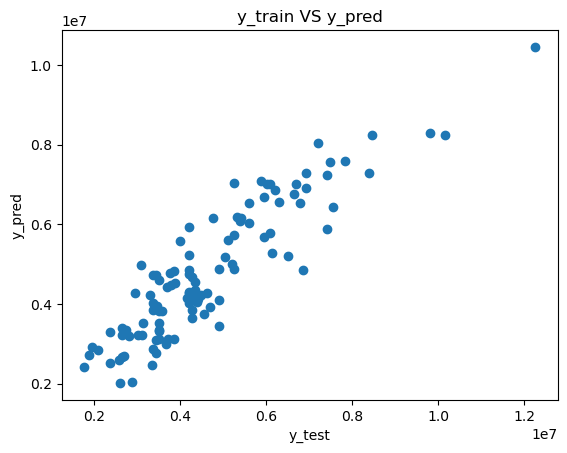

In [52]:
plt.scatter(y_test,y_pred)
plt.title('y_train VS y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

It looks like a linear scatter that means The linear regression model performs well.